<h1>Market Price Prediction</h1>

<h3>1-Data Preprocessing:</h3>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("C:/Users/Lenovo/Downloads/MarketPricePrediction.csv")
data.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


In [5]:
data.isna().sum()

market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64

In [6]:
data.shape

(10227, 10)

In [7]:
data.columns

Index(['market', 'month', 'year', 'quantity', 'priceMin', 'priceMax',
       'priceMod', 'state', 'city', 'date'],
      dtype='object')

In [8]:
data=data[['market','quantity','priceMin','priceMax','priceMod','date']]

In [9]:
market=data['market'].unique()
print(market)

['ABOHAR(PB)' 'AGRA(UP)' 'AHMEDABAD(GUJ)' 'AHMEDNAGAR(MS)' 'AJMER(RAJ)'
 'ALIGARH(UP)' 'ALWAR(RAJ)' 'AMRITSAR(PB)' 'BALLIA(UP)' 'BANGALORE'
 'BAREILLY(UP)' 'BELGAUM(KNT)' 'BHATINDA(PB)' 'BHAVNAGAR(GUJ)' 'BHOPAL'
 'BHUBNESWER(OR)' 'BIHARSHARIF(BHR)' 'BIJAPUR(KNT)' 'BIKANER(RAJ)'
 'BOMBORI(MS)' 'BURDWAN(WB)' 'CHAKAN(MS)' 'CHALLAKERE(KNT)' 'CHANDIGARH'
 'CHANDVAD(MS)' 'CHENNAI' 'CHICKBALLAPUR(KNT)' 'COIMBATORE(TN) (bellary)'
 'COIMBATORE(TN) (podisu)' 'DEESA(GUJ)' 'DEHRADOON(UTT)' 'DELHI'
 'DEORIA(UP)' 'DEVALA(MS)' 'DEWAS(MP)' 'DHAVANGERE(KNT)' 'DHULIA(MS)'
 'DINDIGUL(TN)' 'DINDIGUL(TN)(Podis' 'DINDORI(MS)' 'ETAWAH(UP)'
 'GONDAL(GUJ)' 'GORAKHPUR(UP)' 'GUWAHATI' 'HALDWANI(UTT)' 'HASSAN(KNT)'
 'HOSHIARPUR(PB)' 'HUBLI(KNT)' 'HYDERABAD' 'INDORE(MP)' 'JAIPUR'
 'JALANDHAR(PB)' 'JALGAON(MS)' 'JALGAON(WHITE)' 'JAMMU' 'JAMNAGAR(GUJ)'
 'JODHPUR(RAJ)' 'JUNNAR(MS)' 'KALVAN(MS)' 'KANPUR(UP)' 'KARNAL(HR)'
 'KHANNA(PB)' 'KOLAR(KNT)' 'KOLHAPUR(MS)' 'KOLKATA' 'KOPERGAON(MS)'
 'KOTA(RAJ)' 'KURNOOL(AP)' 'LA

In [10]:
data['date'] = pd.to_datetime(data['date'], format='%B-%Y')


In [11]:
data.head()

,market,quantity,priceMin,priceMax,priceMod,date
0,ABOHAR(PB),2350,404,493,446,2005-01-01
1,ABOHAR(PB),900,487,638,563,2006-01-01
2,ABOHAR(PB),790,1283,1592,1460,2010-01-01
3,ABOHAR(PB),245,3067,3750,3433,2011-01-01
4,ABOHAR(PB),1035,523,686,605,2012-01-01


In [12]:
summary_stats = data.describe(include='all')
summary_stats

,market,quantity,priceMin,priceMax,priceMod,date
count,10227,1.022700e+04,10227.000000,10227.000000,10227.000000,10227
unique,120,NaN,NaN,NaN,NaN,NaN
top,LASALGAON(MS),NaN,NaN,NaN,NaN,NaN
freq,242,NaN,NaN,NaN,NaN,NaN
mean,NaN,7.660488e+04,646.944363,1212.760731,984.284345,2009-06-22 18:57:58.556761344
min,NaN,2.000000e+01,16.000000,145.000000,80.000000,1996-01-01 00:00:00
25%,NaN,8.898000e+03,209.000000,557.000000,448.000000,2006-04-01 00:00:00
50%,NaN,2.746000e+04,440.000000,923.000000,747.000000,2009-11-01 00:00:00
75%,NaN,8.835650e+04,828.000000,1527.000000,1248.000000,2013-03-01 00:00:00
max,NaN,1.639032e+06,6000.000000,8192.000000,6400.000000,2016-02-01 00:00:00


<h3>2-Exploratory Data Analysis (EDA):</h3>

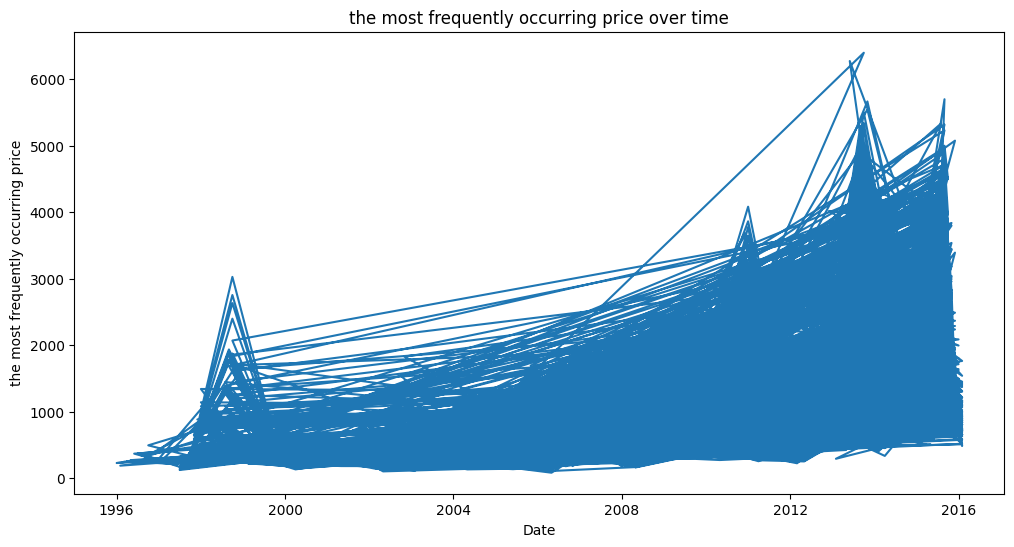

In [13]:
plt.figure(figsize=(12,6))
plt.plot(data['date'],data['priceMod'])
plt.title('the most frequently occurring price over time')
plt.xlabel('Date')
plt.ylabel('the most frequently occurring price')
plt.show()

Modal price increase over time

In [14]:
pip install statsmodels

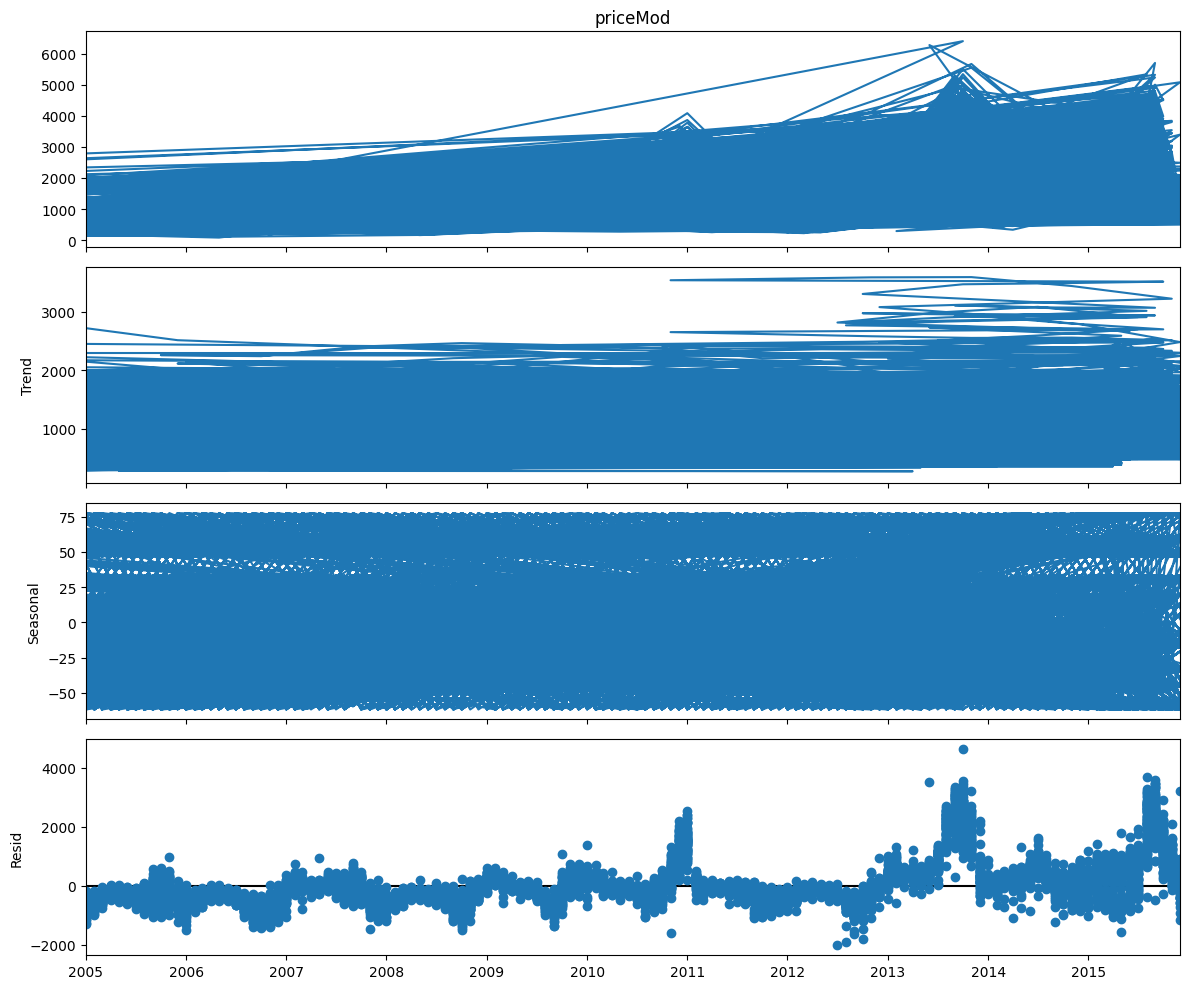

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(data.set_index('date')['priceMod'], model='additive', period=12)

# Plot the decomposed components
plt.rcParams.update({'figure.figsize': (12, 10)})
result.plot()
plt.show()

1. Trend: The overall trend is upward, suggesting an increase in priceMod over time. However, the presence of multiple lines indicates there might be several sub-trends within the data.<br>2. Seasonality: There are clear seasonal patterns, though they are not easy to interpret due to the overlapping lines. Each category or sub-series might have its own seasonal pattern.
3. 
Residuals: The residuals show significant variability, with pronounced spikes indicating irregular events or outliers, especially in the later years of the seri>
r

<h3>3-Feature Engineering</h3>

In [16]:
# Create lagged variables
data['priceMod_lag1'] = data['priceMod'].shift(1)
data['priceMod_lag2'] = data['priceMod'].shift(2)
data['priceMod_lag3'] = data['priceMod'].shift(3)

# Create rolling statistics
data['priceMod_rolling_mean_3'] = data['priceMod'].rolling(window=3).mean()
data['priceMod_rolling_mean_6'] = data['priceMod'].rolling(window=6).mean()
data['priceMod_rolling_mean_12'] = data['priceMod'].rolling(window=12).mean()
data['priceMod_rolling_std_3'] = data['priceMod'].rolling(window=3).std()
data['priceMod_rolling_std_6'] = data['priceMod'].rolling(window=6).std()
data['priceMod_rolling_std_12'] = data['priceMod'].rolling(window=12).std()

# Create seasonal indicators
data['month'] = data['date'].dt.month
data['day_of_week'] = data['date'].dt.dayofweek

# Drop NA values created by shifting and rolling operations
data = data.dropna()

# Display the first few rows to verify the new features
data.head()

,market,quantity,priceMin,priceMax,priceMod,date,priceMod_lag1,priceMod_lag2,priceMod_lag3,priceMod_rolling_mean_3,priceMod_rolling_mean_6,priceMod_rolling_mean_12,priceMod_rolling_std_3,priceMod_rolling_std_6,priceMod_rolling_std_12,month,day_of_week
11,ABOHAR(PB),300,950,1400,1125,2011-02-01,1322.0,380.0,324.0,942.333333,1003.333333,1177.666667,496.856451,529.513613,862.039266,2,1
12,ABOHAR(PB),675,510,650,570,2012-02-01,1125.0,1322.0,380.0,1005.666667,889.000000,1188.000000,389.944013,538.038660,853.168959,2,2
13,ABOHAR(PB),845,1400,1843,1629,2013-02-01,570.0,1125.0,1322.0,1108.000000,891.666667,1276.833333,529.704635,542.366911,837.530443,2,4
14,ABOHAR(PB),1115,831,1163,983,2014-02-01,1629.0,570.0,1125.0,1060.666667,1001.500000,1237.083333,533.754938,465.730716,839.364311,2,5
15,ABOHAR(PB),1115,1200,1946,1688,2015-02-01,983.0,1629.0,570.0,1433.333333,1219.500000,1091.666667,391.114220,420.571397,511.448981,2,6


<h3>4-Model Selection and Training:</h3>

**Arima**

In [17]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Split data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data['priceMod'][:train_size], data['priceMod'][train_size:]

# Fit ARIMA model
model_arima = ARIMA(train, order=(5, 1, 0))
model_fit_arima = model_arima.fit()

# Make predictions
predictions_arima = model_fit_arima.forecast(steps=len(test))

# Evaluate model
mae_arima = mean_absolute_error(test, predictions_arima)
mse_arima = mean_squared_error(test, predictions_arima)
rmse_arima = np.sqrt(mse_arima)

mae_arima, mse_arima, rmse_arima

C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Lenovo\AppData\

(564.8598403813028, 840177.8737207184, 916.6121719248106)

**Sarima**

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model
model_sarima = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit_sarima = model_sarima.fit(disp=False)

# Make predictions
predictions_sarima = model_fit_sarima.forecast(steps=len(test))

# Evaluate model
mae_sarima = mean_absolute_error(test, predictions_sarima)
mse_sarima = mean_squared_error(test, predictions_sarima)
rmse_sarima = np.sqrt(mse_sarima)

mae_sarima, mse_sarima, rmse_sarima

C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exc

(506.8642037868508, 622589.4406594924, 789.0433705820564)

**LSTM**

In [19]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prepare data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['priceMod']].values)

# Split data into train and test sets
train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[:train_size], scaled_data[train_size:]

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X_train, y_train = create_sequences(train, seq_length)
X_test, y_test = create_sequences(test, seq_length)

# Build LSTM model
model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train LSTM model
model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Make predictions
predictions_lstm = model_lstm.predict(X_test)
predictions_lstm = scaler.inverse_transform(predictions_lstm)

# Evaluate model
y_test_inverse = scaler.inverse_transform(y_test)
mae_lstm = mean_absolute_error(y_test_inverse, predictions_lstm)
mse_lstm = mean_squared_error(y_test_inverse, predictions_lstm)
rmse_lstm = np.sqrt(mse_lstm)

mae_lstm, mse_lstm, rmse_lstm

C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0166
Epoch 2/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0141
Epoch 3/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0134
Epoch 4/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0137
Epoch 5/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0135
Epoch 6/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0131
Epoch 7/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0130
Epoch 8/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0124
Epoch 9/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0120
Epoch 10/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0119
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


(480.5369953223034, 487189.9518615255, 697.9899367910152)

<h3>5-Model Evaluation:</h3>

In [20]:
results = {
    'Model': ['ARIMA', 'SARIMA','LSTM'],
    'MAE': [mae_arima, mae_sarima, mae_lstm],
    'MSE': [mse_arima, mse_sarima, mse_lstm],
    'RMSE': [rmse_arima, rmse_sarima,rmse_lstm]
}

results_df = pd.DataFrame(results)
print(results_df)

    Model         MAE            MSE        RMSE
0   ARIMA  564.859840  840177.873721  916.612172
1  SARIMA  506.864204  622589.440659  789.043371
2    LSTM  480.536995  487189.951862  697.989937


LSTM has the best performance among the three models as it has the lowest MAE, MSE, and RMSE values.

<h3>6-Fine-tuning and Validation:</h3>

**Arima & Sarima**

In [ ]:
import itertools
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Define the p, d, q parameters to take any value between 0 and 2
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

# Define the seasonal parameters
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

best_aic = float("inf")
best_params = None
best_seasonal_params = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model_sarima = SARIMAX(train, order=param, seasonal_order=param_seasonal)
            results = model_sarima.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_params = param
                best_seasonal_params = param_seasonal
        except:
            continue

print(f'Best ARIMA parameters: {best_params}')
print(f'Best seasonal parameters: {best_seasonal_params}')